Saving dados_com_onehot_feriados (1) (1).xlsx to dados_com_onehot_feriados (1) (1).xlsx


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp85q7quau/4i5jmtha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp85q7quau/g0evj8nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75455', 'data', 'file=/tmp/tmp85q7quau/4i5jmtha.json', 'init=/tmp/tmp85q7quau/g0evj8nt.json', 'output', 'file=/tmp/tmp85q7quau/prophet_modelw2nr_9ml/prophet_model-20250713114403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📋 Tabela completa com previsões:
             ds        yhat  yhat_lower  yhat_upper
1086 2024-12-27  463.659458  432.897995  495.557863
1087 2024-12-28  469.412742  439.042629  496.536958
1088 2024-12-29  462.229541  432.235353  491.225349
1089 2024-12-30  450.495026  419.337846  480.858746
1090 2024-12-31  450.393446  420.361840  482.775528

📊 Métricas de desempenho do modelo:
    Métrica       Valor
0  MAPE (%)    7.908727
1       MAE   14.973850
2       MSE  575.669180
3      RMSE   23.993107
4        R²    0.942732


/tmp/ipython-input-2-2133260780.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Métrica', y='Valor', data=df_metricas, palette='Blues_r')
/tmp/ipython-input-2-2133260780.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


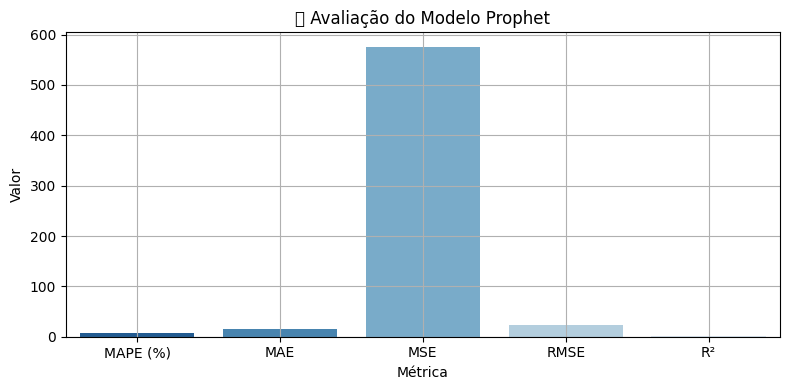


📅 Previsão para Dezembro/2024:
             ds        yhat  yhat_lower  yhat_upper
1060 2024-12-01  422.048293  391.153665  450.163119
1061 2024-12-02  413.235216  378.587527  444.449333
1062 2024-12-03  416.427589  386.433418  447.494159
1063 2024-12-04  421.706025  393.004182  451.763353
1064 2024-12-05  426.330715  396.790498  456.318299
1065 2024-12-06  430.368962  399.843220  461.902783
1066 2024-12-07  439.542283  408.323041  469.185436
1067 2024-12-08  436.141734  404.355873  466.616118
1068 2024-12-09  428.491927  398.646274  457.885469
1069 2024-12-10  432.709564  403.576066  462.313057
1070 2024-12-11  438.844148  408.919278  471.684851
1071 2024-12-12  444.128103  415.322414  474.105676
1072 2024-12-13  448.605052  418.874514  476.197758
1073 2024-12-14  457.977583  426.333692  491.226137
1074 2024-12-15  454.523099  424.328845  487.224319
1075 2024-12-16  446.558238  415.285387  475.151186
1076 2024-12-17  450.197672  419.617413  480.517517
1077 2024-12-18  455.494921  426

/tmp/ipython-input-2-2133260780.py:96: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


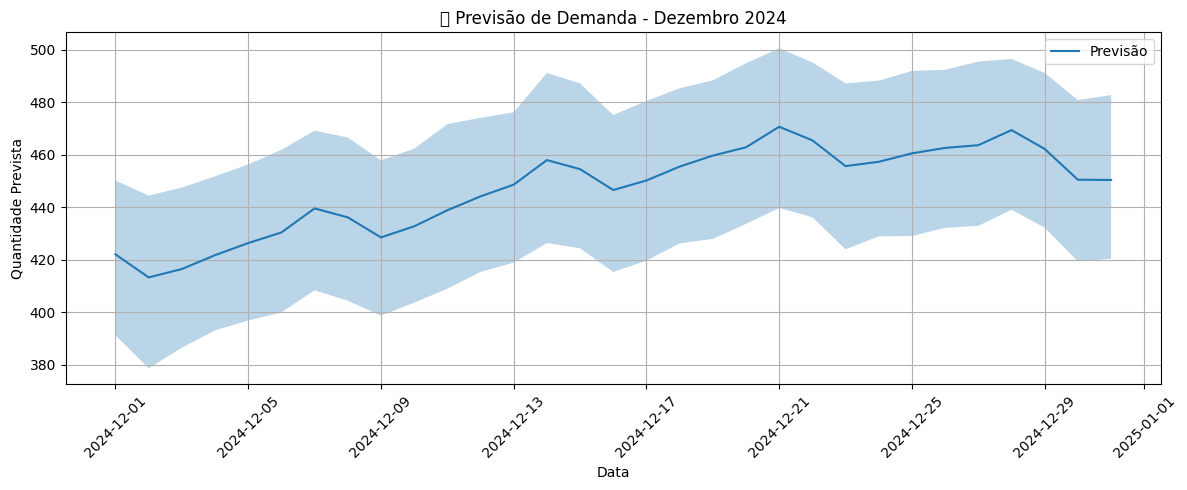

In [2]:
# 📦 Instalação (somente uma vez, se necessário)
!pip install prophet pandas matplotlib seaborn openpyxl scikit-learn --quiet

# ✅ Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# ✅ Upload do Excel (Google Colab)
from google.colab import files
import io

uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_path]))

# ✅ Tratamento de data e variável alvo
df = df[['Timestamp', 'Camisetas_básicas_masculinas']].rename(columns={'Timestamp': 'ds', 'Camisetas_básicas_masculinas': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# ✅ Validações
if df['y'].notna().sum() < 2:
    raise ValueError("❌ Menos de 2 registros válidos na série temporal.")
if df[(df['ds'].dt.year == 2024) & (df['ds'].dt.month == 12) & (df['y'].isna())].empty:
    raise ValueError("❌ Nenhuma linha com y nulo para Dezembro/2024 encontrada para previsão.")

# ✅ Treino
df_treino = df[df['y'].notna()].copy()

# ✅ Modelo Prophet
modelo = Prophet()
modelo.fit(df_treino)

# ✅ Criar DataFrame futuro com base nos dados existentes
futuro = modelo.make_future_dataframe(periods=31)  # dezembro
forecast = modelo.predict(futuro)

# ✅ Tabela com previsões completas
tabela_previsoes = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("\n📋 Tabela completa com previsões:")
print(tabela_previsoes.tail())

# ✅ Avaliação no treino
df_treino['previsto'] = modelo.predict(df_treino[['ds']])['yhat']

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

y_true = df_treino['y']
y_pred = df_treino['previsto']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_true, y_pred)
mape_val = mape(y_true, y_pred)

# ✅ Tabela de métricas
df_metricas = pd.DataFrame({
    'Métrica': ['MAPE (%)', 'MAE', 'MSE', 'RMSE', 'R²'],
    'Valor': [mape_val, mae, mse, rmse, r2]
})
print("\n📊 Métricas de desempenho do modelo:")
print(df_metricas)

# ✅ Gráfico das métricas
plt.figure(figsize=(8, 4))
sns.barplot(x='Métrica', y='Valor', data=df_metricas, palette='Blues_r')
plt.title('📊 Avaliação do Modelo Prophet')
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Previsão de Dezembro de 2024
previsao_dez = forecast[(forecast['ds'].dt.year == 2024) & (forecast['ds'].dt.month == 12)]
print("\n📅 Previsão para Dezembro/2024:")
print(previsao_dez[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# ✅ Gráfico da previsão de dezembro
plt.figure(figsize=(12, 5))
plt.plot(previsao_dez['ds'], previsao_dez['yhat'], label='Previsão')
plt.fill_between(previsao_dez['ds'], previsao_dez['yhat_lower'], previsao_dez['yhat_upper'], alpha=0.3)
plt.title('📈 Previsão de Demanda - Dezembro 2024')
plt.xlabel('Data')
plt.ylabel('Quantidade Prevista')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
